In [1]:
import json
import requests
import csv
import pandas as pd
import os
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
country_list = ['BRA', 'IND', 'ZAF', 'ECU', 'ARG', 'LBY']

In [3]:
indicator_list = ['AG.LND.AGRI.ZS', 'SP.POP.DPND', 'SP.DYN.CBRT.IN', 'NE.EXP.GNFS.ZS', 'NY.GDP.MKTP.CD', \
 'NY.GDP.MKTP.KD.ZG', 'SP.POP.GROW', 'FI.RES.TOTL.CD', 'NE.TRD.GNFS.ZS']
indicator_value = []

for country in country_list:
    for indicator in indicator_list:
        indicator_response = requests.get('http://api.worldbank.org/countries/' \
                                         + country + '/indicators/' + indicator + '?format=json&per_page=1000')

        homepath = os.path.expanduser('~')
        filepath = 'P:\\ADS\\Final\\Data\\'+ indicator + '\\'
        filename = filepath + country + '.json'
        
        if not os.path.exists(filepath):            
            print('Creating required directories!!', '\n')
            os.makedirs(filepath)
            
        with open(filename, 'w') as f:
            f.write(indicator_response.text)

        indicator_response_toFile = open(filename, 'r', errors = 'ignore') # Opening the file
        indicator_data = json.load(indicator_response_toFile)            

        if indicator_data[0]['total'] > 0:
            for data in indicator_data[1:]:
                for yeardata in data:                
                    indicator_value.append([yeardata['country']['value'], yeardata['country']['id'], \
                                            yeardata['indicator']['id'], yeardata['value'], yeardata['indicator']['value'], \
                                            yeardata['date'] + '-01-01'])
    
headers = ['CountryName', 'CountryCode', 'IndicatorCode', 'Value', 'Value Description', 'Year']
indicator_df = pd.DataFrame(indicator_value, columns=headers)
    
actual_filename ='P:\\ADS\\Final\\Indicators_Combined.csv'
indicator_df.to_csv(actual_filename, index=False)

#indicator_df.head()

In [4]:
indicator_data = pd.read_csv('P:\\ADS\\Final\\Indicators_Combined.csv', low_memory=False) 
indicator_data.head(5)

,CountryName,CountryCode,IndicatorCode,Value,Value Description,Year
0,Brazil,BR,AG.LND.AGRI.ZS,NaN,Agricultural land (% of land area),2016-01-01
1,Brazil,BR,AG.LND.AGRI.ZS,NaN,Agricultural land (% of land area),2015-01-01
2,Brazil,BR,AG.LND.AGRI.ZS,33.810034,Agricultural land (% of land area),2014-01-01
3,Brazil,BR,AG.LND.AGRI.ZS,33.357673,Agricultural land (% of land area),2013-01-01
4,Brazil,BR,AG.LND.AGRI.ZS,32.974681,Agricultural land (% of land area),2012-01-01


# Indicator Value Variance in Argentina

In [5]:
argentina_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                      (indicator_data['CountryCode'] == 'AR')]
argentina_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                      (indicator_data['CountryCode'] == 'AR')]


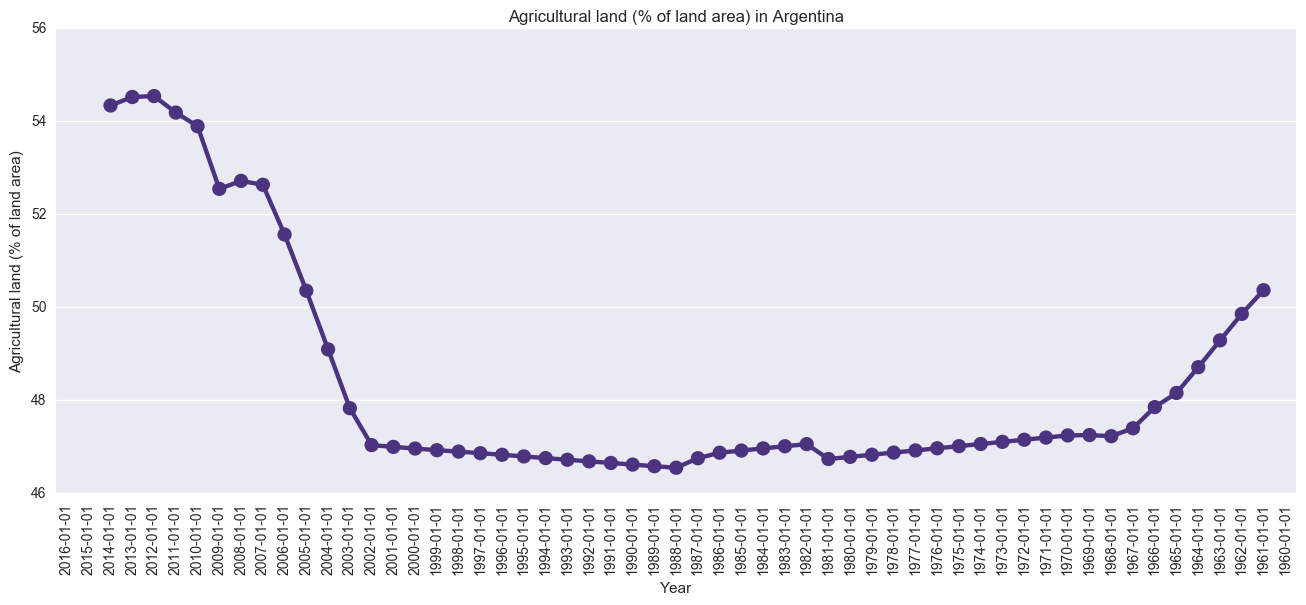

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind1.Year, y=argentina_df_ind1.Value, data=argentina_df_ind1, ax=ax1, color="#4c337f") 
ax1.set_title('Agricultural land (% of land area) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Agricultural land (% of land area)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

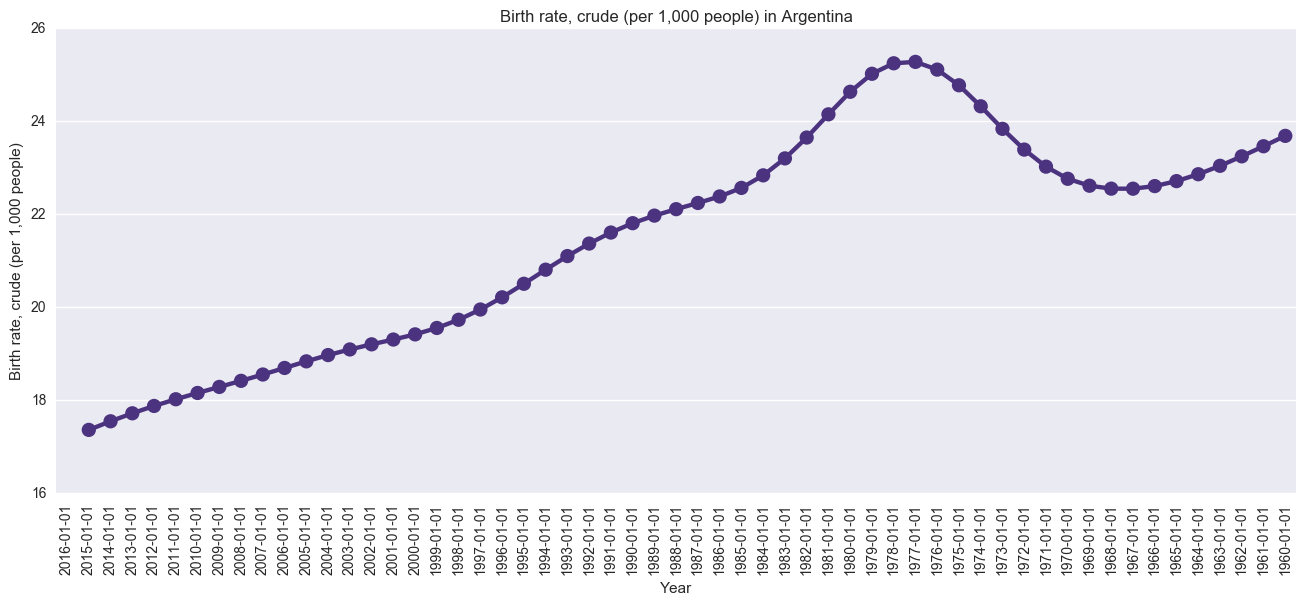

In [7]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind2.Year, y=argentina_df_ind2.Value, data=argentina_df_ind2, ax=ax1, color="#4c337f") 
ax1.set_title('Birth rate, crude (per 1,000 people) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Birth rate, crude (per 1,000 people)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

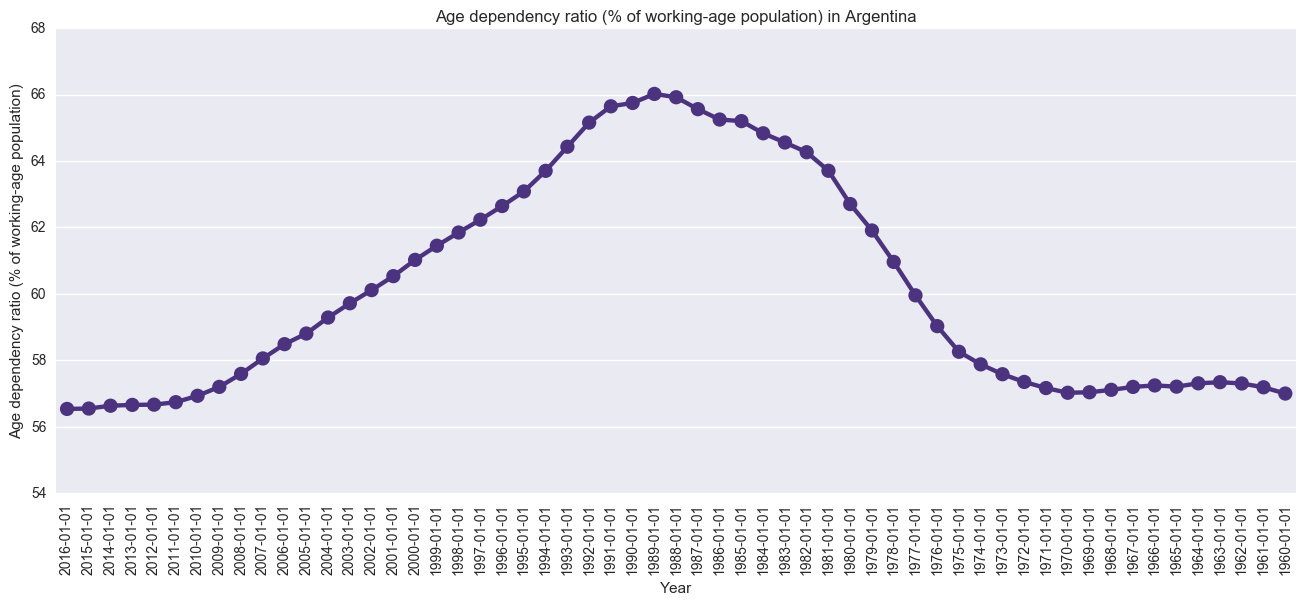

In [8]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind3.Year, y=argentina_df_ind3.Value, data=argentina_df_ind3, ax=ax1, color="#4c337f") 
ax1.set_title('Age dependency ratio (% of working-age population) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Age dependency ratio (% of working-age population)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

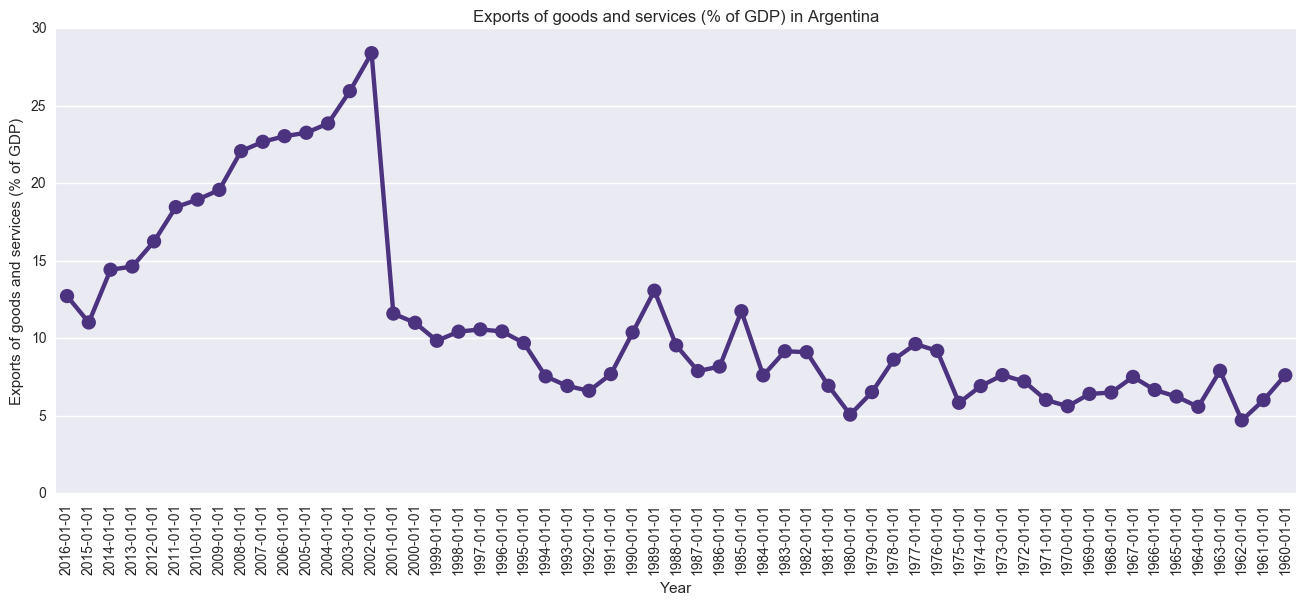

In [9]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind4.Year, y=argentina_df_ind4.Value, data=argentina_df_ind4, ax=ax1, color="#4c337f") 
ax1.set_title('Exports of goods and services (% of GDP) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Exports of goods and services (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

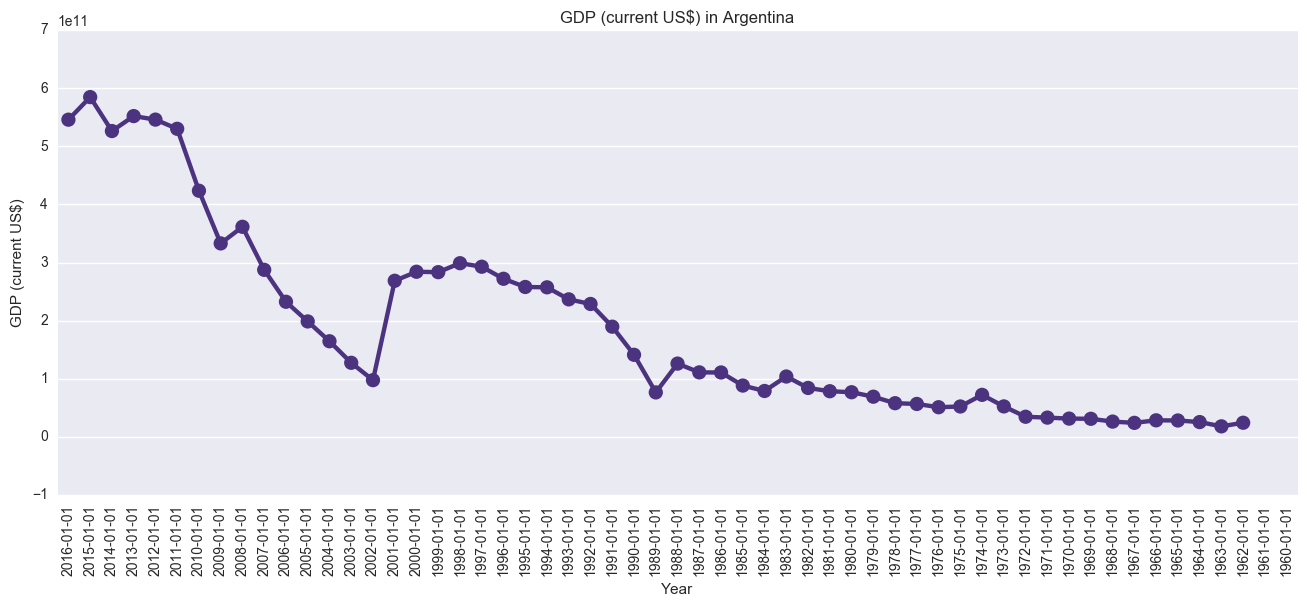

In [10]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind5.Year, y=argentina_df_ind5.Value, data=argentina_df_ind5, ax=ax1, color="#4c337f") 
ax1.set_title('GDP (current US$) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

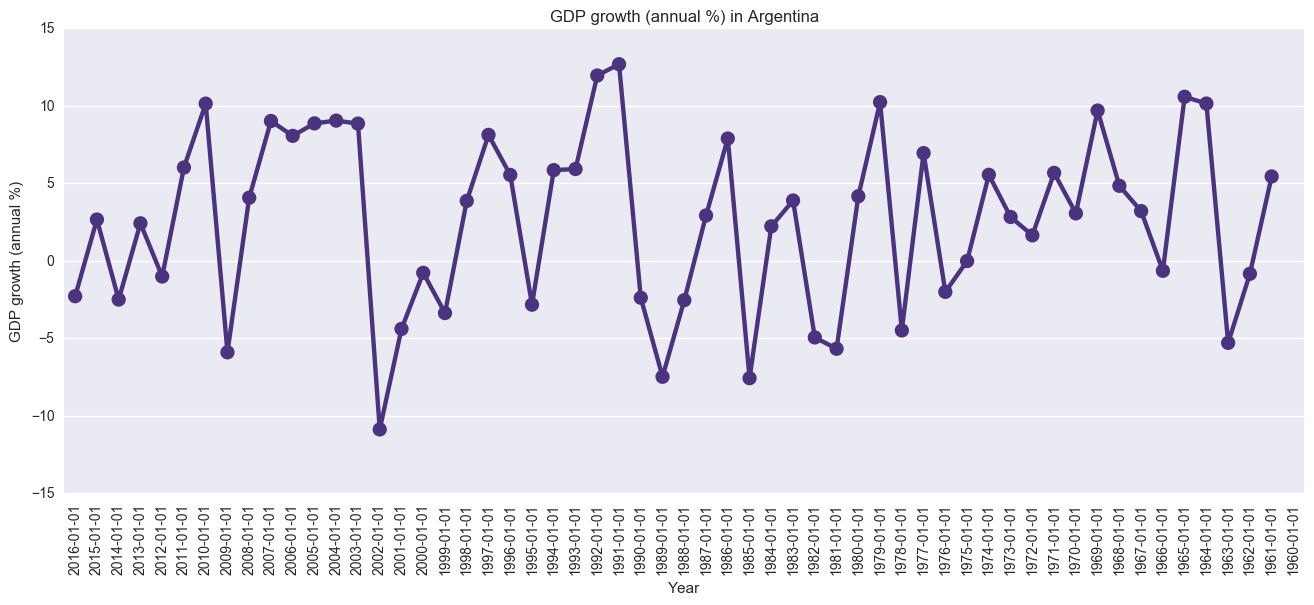

In [11]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind6.Year, y=argentina_df_ind6.Value, data=argentina_df_ind6, ax=ax1, color="#4c337f") 
ax1.set_title('GDP growth (annual %) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

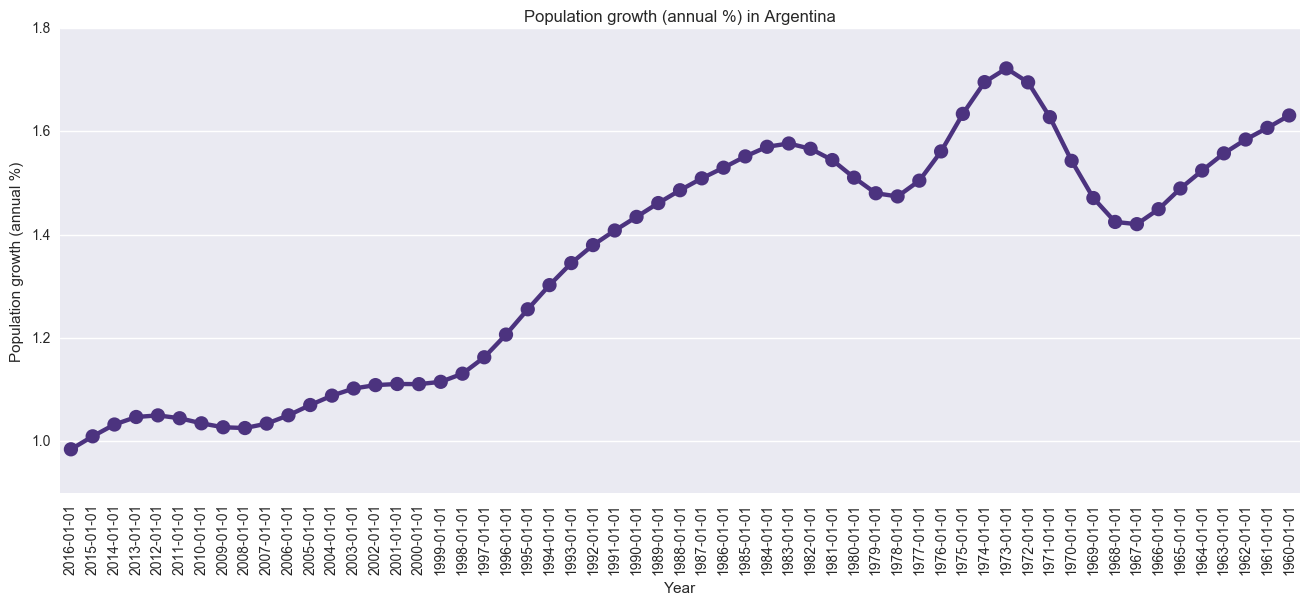

In [12]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind7.Year, y=argentina_df_ind7.Value, data=argentina_df_ind7, ax=ax1, color="#4c337f") 
ax1.set_title('Population growth (annual %) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

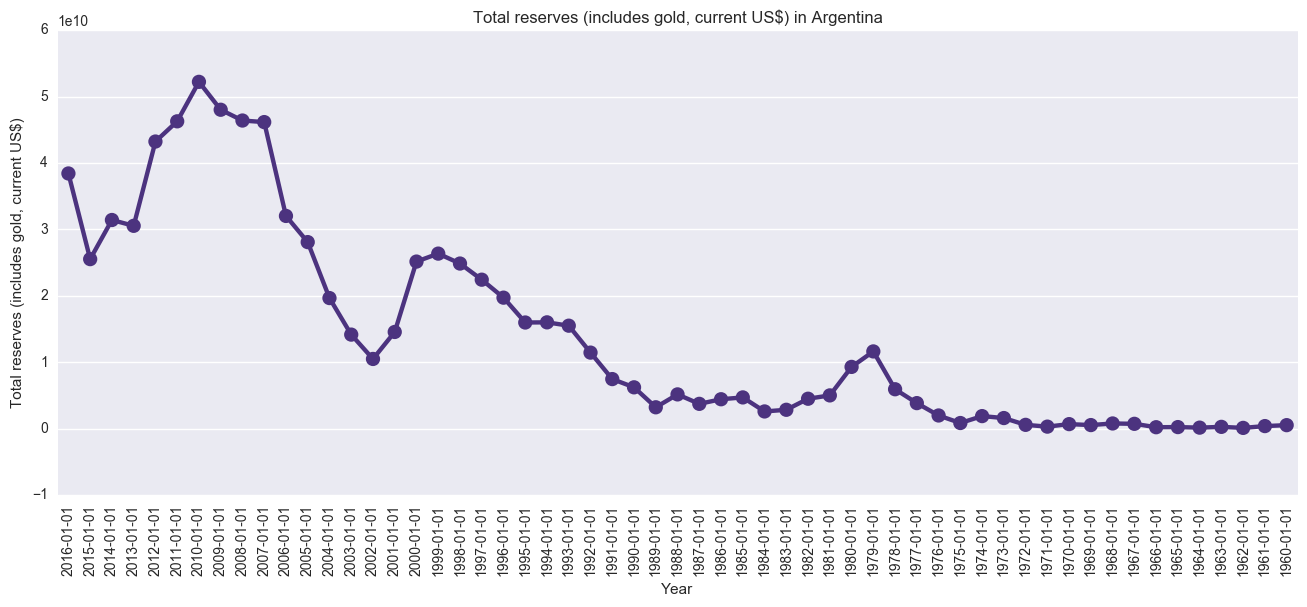

In [13]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind8.Year, y=argentina_df_ind8.Value, data=argentina_df_ind8, ax=ax1, color="#4c337f") 
ax1.set_title('Total reserves (includes gold, current US$) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total reserves (includes gold, current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

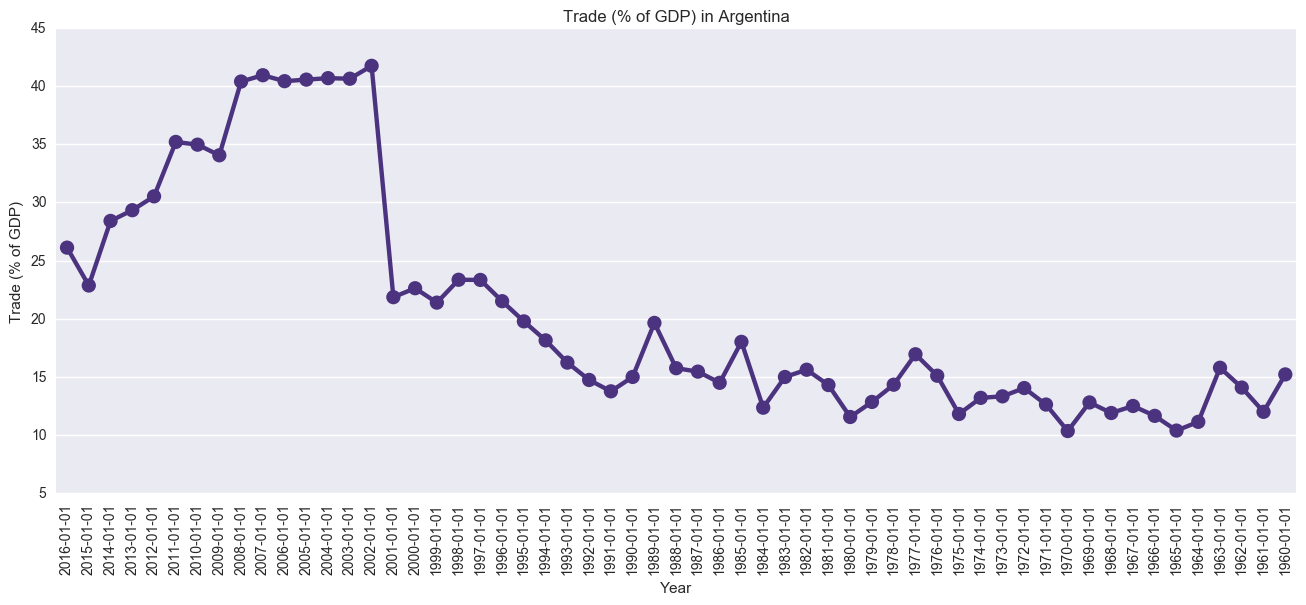

In [14]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(argentina_df_ind1.Year, argentina_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=argentina_df_ind9.Year, y=argentina_df_ind9.Value, data=argentina_df_ind9, ax=ax1, color="#4c337f") 
ax1.set_title('Trade (% of GDP) in Argentina')
ax1.set_xlabel("Year")
ax1.set_ylabel("Trade (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

# Indicator Value Variance in Brazil

In [ ]:
brazil_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) &\
                                (indicator_data['CountryCode'] == 'BR')]
brazil_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) &\
                                (indicator_data['CountryCode'] == 'BR')]

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind1.Year, y=brazil_df_ind1.Value, data=brazil_df_ind1, ax=ax1, color="#4c337f") 
ax1.set_title('Agricultural land (% of land area) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Agricultural land (% of land area)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind2.Year, y=brazil_df_ind2.Value, data=brazil_df_ind2, ax=ax1, color="#4c337f") 
ax1.set_title('Birth rate, crude (per 1,000 people) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Birth rate, crude (per 1,000 people)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind3.Year, y=brazil_df_ind3.Value, data=brazil_df_ind3, ax=ax1, color="#4c337f") 
ax1.set_title('Age dependency ratio (% of working-age population) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Age dependency ratio (% of working-age population)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind4.Year, y=brazil_df_ind4.Value, data=brazil_df_ind4, ax=ax1, color="#4c337f") 
ax1.set_title('Exports of goods and services (% of GDP) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Exports of goods and services (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind5.Year, y=brazil_df_ind5.Value, data=brazil_df_ind5, ax=ax1, color="#4c337f") 
ax1.set_title('GDP (current US$) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind6.Year, y=brazil_df_ind6.Value, data=brazil_df_ind6, ax=ax1, color="#4c337f") 
ax1.set_title('GDP growth (annual %) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind7.Year, y=brazil_df_ind7.Value, data=brazil_df_ind7, ax=ax1, color="#4c337f") 
ax1.set_title('Population growth (annual %) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind8.Year, y=brazil_df_ind8.Value, data=brazil_df_ind8, ax=ax1, color="#4c337f") 
ax1.set_title('Total reserves (includes gold, current US$) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total reserves (includes gold, current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(brazil_df_ind1.Year, brazil_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=brazil_df_ind9.Year, y=brazil_df_ind9.Value, data=brazil_df_ind9, ax=ax1, color="#4c337f") 
ax1.set_title('Trade (% of GDP) in brazil')
ax1.set_xlabel("Year")
ax1.set_ylabel("Trade (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


# Indicator Value Variance in Ecuador

In [ ]:
Ecuador_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]
Ecuador_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                                 (indicator_data['CountryCode'] == 'EC')]

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind1.Year, y=Ecuador_df_ind1.Value, data=Ecuador_df_ind1, ax=ax1, color="#4c337f") 
ax1.set_title('Agricultural land (% of land area) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Agricultural land (% of land area)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind2.Year, y=Ecuador_df_ind2.Value, data=Ecuador_df_ind2, ax=ax1, color="#4c337f") 
ax1.set_title('Birth rate, crude (per 1,000 people) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Birth rate, crude (per 1,000 people)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind3.Year, y=Ecuador_df_ind3.Value, data=Ecuador_df_ind3, ax=ax1, color="#4c337f") 
ax1.set_title('Age dependency ratio (% of working-age population) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Age dependency ratio (% of working-age population)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind4.Year, y=Ecuador_df_ind4.Value, data=Ecuador_df_ind4, ax=ax1, color="#4c337f") 
ax1.set_title('Exports of goods and services (% of GDP) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Exports of goods and services (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind5.Year, y=Ecuador_df_ind5.Value, data=Ecuador_df_ind5, ax=ax1, color="#4c337f") 
ax1.set_title('GDP (current US$) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind6.Year, y=Ecuador_df_ind6.Value, data=Ecuador_df_ind6, ax=ax1, color="#4c337f") 
ax1.set_title('GDP growth (annual %) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind7.Year, y=Ecuador_df_ind7.Value, data=Ecuador_df_ind7, ax=ax1, color="#4c337f") 
ax1.set_title('Population growth (annual %) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind8.Year, y=Ecuador_df_ind8.Value, data=Ecuador_df_ind8, ax=ax1, color="#4c337f") 
ax1.set_title('Total reserves (includes gold, current US$) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total reserves (includes gold, current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Ecuador_df_ind1.Year, Ecuador_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Ecuador_df_ind9.Year, y=Ecuador_df_ind9.Value, data=Ecuador_df_ind9, ax=ax1, color="#4c337f") 
ax1.set_title('Trade (% of GDP) in Ecuador')
ax1.set_xlabel("Year")
ax1.set_ylabel("Trade (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

# Indicator Value Variance in India

In [ ]:
India_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                               (indicator_data['CountryCode'] == 'IN')]
India_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                               (indicator_data['CountryCode'] == 'IN')]

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind1.Year, y=India_df_ind1.Value, data=India_df_ind1, ax=ax1, color="#4c337f") 
ax1.set_title('Agricultural land (% of land area) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Agricultural land (% of land area)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind2.Year, y=India_df_ind2.Value, data=India_df_ind2, ax=ax1, color="#4c337f") 
ax1.set_title('Birth rate, crude (per 1,000 people) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Birth rate, crude (per 1,000 people)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind3.Year, y=India_df_ind3.Value, data=India_df_ind3, ax=ax1, color="#4c337f") 
ax1.set_title('Age dependency ratio (% of working-age population) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Age dependency ratio (% of working-age population)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind4.Year, y=India_df_ind4.Value, data=India_df_ind4, ax=ax1, color="#4c337f") 
ax1.set_title('Exports of goods and services (% of GDP) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Exports of goods and services (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind5.Year, y=India_df_ind5.Value, data=India_df_ind5, ax=ax1, color="#4c337f") 
ax1.set_title('GDP (current US$) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind6.Year, y=India_df_ind6.Value, data=India_df_ind6, ax=ax1, color="#4c337f") 
ax1.set_title('GDP growth (annual %) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind7.Year, y=India_df_ind7.Value, data=India_df_ind7, ax=ax1, color="#4c337f") 
ax1.set_title('Population growth (annual %) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind8.Year, y=India_df_ind8.Value, data=India_df_ind8, ax=ax1, color="#4c337f") 
ax1.set_title('Total reserves (includes gold, current US$) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total reserves (includes gold, current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(India_df_ind1.Year, India_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=India_df_ind9.Year, y=India_df_ind9.Value, data=India_df_ind9, ax=ax1, color="#4c337f") 
ax1.set_title('Trade (% of GDP) in India')
ax1.set_xlabel("Year")
ax1.set_ylabel("Trade (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

# Indicator Value Variance in Libya

In [ ]:
Libya_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                               (indicator_data['CountryCode'] == 'LY')]
Libya_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                               (indicator_data['CountryCode'] == 'LY')]

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind1.Year, y=Libya_df_ind1.Value, data=Libya_df_ind1, ax=ax1, color="#4c337f") 
ax1.set_title('Agricultural land (% of land area) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Agricultural land (% of land area)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind2.Year, y=Libya_df_ind2.Value, data=Libya_df_ind2, ax=ax1, color="#4c337f") 
ax1.set_title('Birth rate, crude (per 1,000 people) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Birth rate, crude (per 1,000 people)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind3.Year, y=Libya_df_ind3.Value, data=Libya_df_ind3, ax=ax1, color="#4c337f") 
ax1.set_title('Age dependency ratio (% of working-age population) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Age dependency ratio (% of working-age population)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind4.Year, y=Libya_df_ind4.Value, data=Libya_df_ind4, ax=ax1, color="#4c337f") 
ax1.set_title('Exports of goods and services (% of GDP) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Exports of goods and services (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind5.Year, y=Libya_df_ind5.Value, data=Libya_df_ind5, ax=ax1, color="#4c337f") 
ax1.set_title('GDP (current US$) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind6.Year, y=Libya_df_ind6.Value, data=Libya_df_ind6, ax=ax1, color="#4c337f") 
ax1.set_title('GDP growth (annual %) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind7.Year, y=Libya_df_ind7.Value, data=Libya_df_ind7, ax=ax1, color="#4c337f") 
ax1.set_title('Population growth (annual %) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind8.Year, y=Libya_df_ind8.Value, data=Libya_df_ind8, ax=ax1, color="#4c337f") 
ax1.set_title('Total reserves (includes gold, current US$) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total reserves (includes gold, current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(Libya_df_ind1.Year, Libya_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=Libya_df_ind9.Year, y=Libya_df_ind9.Value, data=Libya_df_ind9, ax=ax1, color="#4c337f") 
ax1.set_title('Trade (% of GDP) in Libya')
ax1.set_xlabel("Year")
ax1.set_ylabel("Trade (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

# Indicator Value Variance in South_Africa

In [ ]:
South_Africa_df_ind1 = indicator_data[(indicator_data['IndicatorCode'].isin(['AG.LND.AGRI.ZS'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind2 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.DYN.CBRT.IN'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind3 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.DPND'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind4 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.EXP.GNFS.ZS'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind5 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.CD'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind6 = indicator_data[(indicator_data['IndicatorCode'].isin(['NY.GDP.MKTP.KD.ZG'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind7 = indicator_data[(indicator_data['IndicatorCode'].isin(['SP.POP.GROW'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind8 = indicator_data[(indicator_data['IndicatorCode'].isin(['FI.RES.TOTL.CD'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]
South_Africa_df_ind9 = indicator_data[(indicator_data['IndicatorCode'].isin(['NE.TRD.GNFS.ZS'])) & \
                                      (indicator_data['CountryCode'] == 'ZA')]

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind1.Year, y=South_Africa_df_ind1.Value, data=South_Africa_df_ind1, ax=ax1, color="#4c337f") 
ax1.set_title('Agricultural land (% of land area) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Agricultural land (% of land area)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind2.Year, y=South_Africa_df_ind2.Value, data=South_Africa_df_ind2, ax=ax1, color="#4c337f") 
ax1.set_title('Birth rate, crude (per 1,000 people) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Birth rate, crude (per 1,000 people)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind3.Year, y=South_Africa_df_ind3.Value, data=South_Africa_df_ind3, ax=ax1, color="#4c337f") 
ax1.set_title('Age dependency ratio (% of working-age population) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Age dependency ratio (% of working-age population)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind4.Year, y=South_Africa_df_ind4.Value, data=South_Africa_df_ind4, ax=ax1, color="#4c337f") 
ax1.set_title('Exports of goods and services (% of GDP) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Exports of goods and services (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind5.Year, y=South_Africa_df_ind5.Value, data=South_Africa_df_ind5, ax=ax1, color="#4c337f") 
ax1.set_title('GDP (current US$) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP (current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind6.Year, y=South_Africa_df_ind6.Value, data=South_Africa_df_ind6, ax=ax1, color="#4c337f") 
ax1.set_title('GDP growth (annual %) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("GDP growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind7.Year, y=South_Africa_df_ind7.Value, data=South_Africa_df_ind7, ax=ax1, color="#4c337f") 
ax1.set_title('Population growth (annual %) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Population growth (annual %)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind8.Year, y=South_Africa_df_ind8.Value, data=South_Africa_df_ind8, ax=ax1, color="#4c337f") 
ax1.set_title('Total reserves (includes gold, current US$) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Total reserves (includes gold, current US$)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(16,6))
ax1 = fig.add_subplot(1, 1, 1)

#ax1.plot(South_Africa_df_ind1.Year, South_Africa_df_ind1.Value, label='orig_cmbnd_ln_to_value', color='c',  linestyle='--')
ax1 = sns.pointplot(x=South_Africa_df_ind9.Year, y=South_Africa_df_ind9.Value, data=South_Africa_df_ind9, ax=ax1, color="#4c337f") 
ax1.set_title('Trade (% of GDP) in South_Africa')
ax1.set_xlabel("Year")
ax1.set_ylabel("Trade (% of GDP)")

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In [ ]:
argentina_df_ind1.drop(argentina_df_ind1.columns[[0, 1, 2, 4]], axis=1, inplace=True)
plt.plot(argentina_df_ind1)

In [ ]:
a_df.drop(a_df.columns[[0, 1, 2, 4]], axis=1, inplace=True)

a_df

In [ ]:
new_df = df[(df['Indicator Code'].isin(['ER.FSH.AQUA.MT', 'EN.ATM.CO2E.KD.GD'])) & (df['Country Code'] == 'IND')]

In [ ]:
new_df.drop(new_df.columns[[0, 1, 2, 3, 4]], axis=1, inplace=True)
new_df.head()